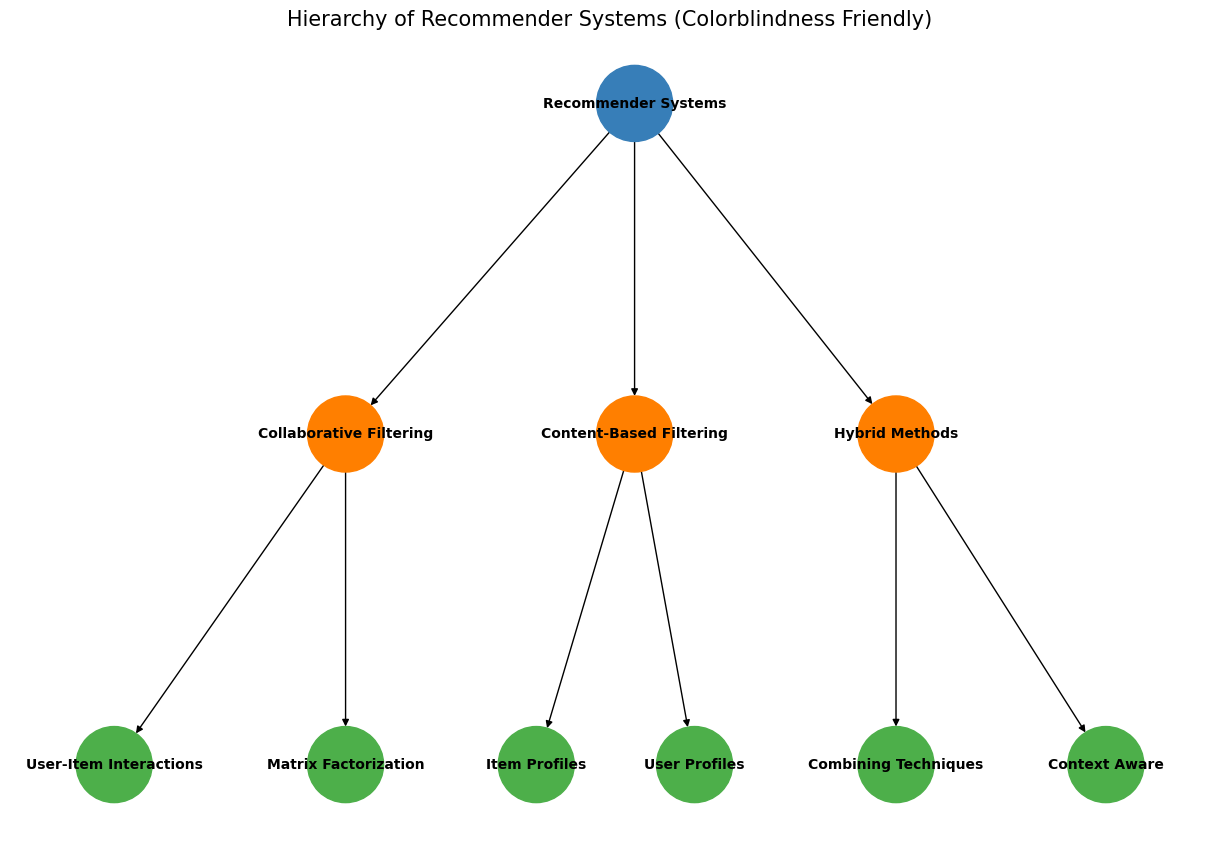

In [7]:
# !pip3 install pygraphviz
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

# Define the structure of the hierarchy
hierarchy = {
    'Recommender Systems': ['Collaborative Filtering', 'Content-Based Filtering', 'Hybrid Methods'],
    'Collaborative Filtering': ['User-Item Interactions', 'Matrix Factorization'],
    'Content-Based Filtering': ['Item Profiles', 'User Profiles'],
    'Hybrid Methods': ['Combining Techniques', 'Context Aware']
}

# Create a directed graph
G = nx.DiGraph()

# Function to add nodes and edges
def add_nodes_and_edges(hierarchy, parent=None):
    if parent is not None and parent not in G:
        G.add_node(parent)
    for node, children in hierarchy.items():
        G.add_node(node)
        if parent is not None:
            G.add_edge(parent, node)
        if isinstance(children, dict):
            add_nodes_and_edges(children, node)
        elif isinstance(children, list):
            for child in children:
                G.add_node(child)
                G.add_edge(node, child)

# Add nodes and edges to the graph
add_nodes_and_edges(hierarchy)

# Define a colorblind-friendly color palette
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']

# Apply the color palette
color_map = []
for node in G:
    if node == 'Recommender Systems':
        color_map.append(colors[0])  # Root node
    elif node in hierarchy.keys():
        color_map.append(colors[1])  # Level 2 nodes
    else:
        color_map.append(colors[2])  # Level 3 nodes

# Draw the graph
plt.figure(figsize=(12, 8))
pos = graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=True, node_color=color_map, node_size=3000, font_size=10, font_weight='bold')
plt.title('Hierarchy of Recommender Systems (Colorblindness Friendly)', size=15)
plt.show()
